# Week 5. In-class Practice

### TF-IDF練習:使用五月天的歌詞 <3

In [4]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
# sys.path.insert(0, '../modules/')


from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [5]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 30


### 製作詞頻矩陣
下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的`fintextmin`函式

In [6]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['五月天', '精選輯'])

## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
stopwords = ['的', '是', '在', '有', '就', '...'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ASUS\AppData\Local\Temp\jieba.cache
Loading model cost 0.845 seconds.
Prefix dict has been built succesfully.


In [7]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('\ufeff', 1),
 ('空無一人', 1),
 ('大街', 1),
 (' ', 40),
 ('闖入', 1),
 ('無人', 1),
 ('婚紗店', 1),
 ('為', 2),
 ('你', 13),
 ('披上', 1)]

In [8]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

D:\PYTHONNNNNNNNNNN\Anaconda\envs\WinterVacationTest\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,花園,好,勇敢,如此,偷偷,滄海,會,用活,天全,刮去,...,佔,阿,挑戰,髮,蒼涼,逛街,理想,夢中,停,不停
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 製作TF-IDF矩陣
可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [9]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm) 


,花園,好,勇敢,如此,偷偷,滄海,會,用活,天全,刮去,...,佔,阿,挑戰,髮,蒼涼,逛街,理想,夢中,停,不停
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.161201,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.066906,0.000000,0.149642,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.030445,0.000000,0.000000,0.000000,0.037369,0.021292,0.000000,0.000000,0.000000,...,0.000000,0.066637,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112107,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078512,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078512,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059437,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.045014,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
wfm
N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]

In [11]:
logdf

[1.4771212547196624,
 1.0,
 1.4771212547196624,
 1.1760912590556813,
 1.1760912590556813,
 1.4771212547196624,
 0.5228787452803376,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.0,
 1.1760912590556813,
 1.4771212547196624,
 1.1760912590556813,
 1.4771212547196624,
 0.7781512503836436,
 1.4771212547196624,
 1.4771212547196624,
 0.3309932190414244,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.1760912590556813,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.0,
 1.4771212547196624,
 1.0,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 0.8750612633917001,
 1.1760912590556813,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 0.7781512503836436,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212

In [12]:
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf

In [13]:
wfm['回憶裡面']

0     3.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
Name: 回憶裡面, dtype: float64

In [3]:
df_tfidf['回憶裡面']

NameError: name 'df_tfidf' is not defined

### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [28]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('餵', 0.0),
 ('低', 0.0),
 ('會', 0.0),
 ('洗掉', 0.0),
 ('圍巾', 0.0),
 ('要餘生', 0.0),
 ('日出', 0.0),
 ('翅膀', 0.0),
 ('傷痕', 0.0),
 ('不停', 0.0)]

### 文字雲

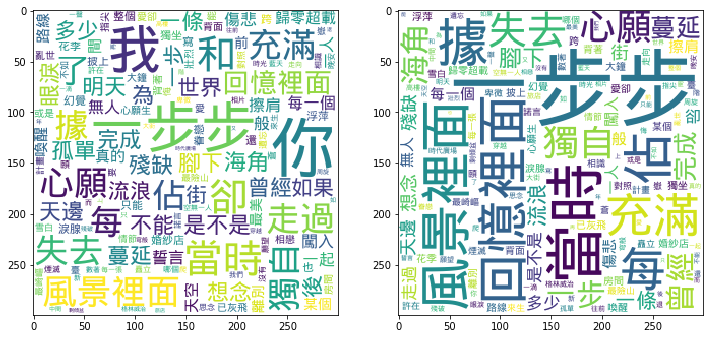

In [29]:
linux_font = 'wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300) 

### 長條圖
可以發現，經過TF-IDF處理之後，比較重要的資訊如「股價」、「747」(註：此指波音747)等詞彙被突顯出來。

每篇文章都會出現的「華航」和所有格用字「的」排序則向下調整。

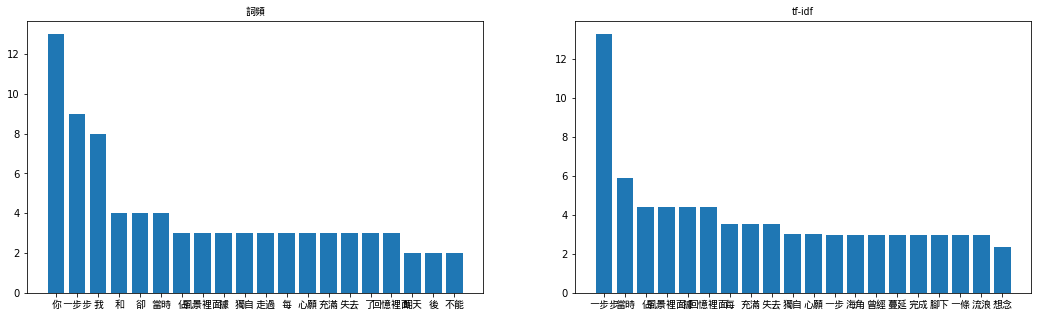

In [30]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf") 